## Experimental results by train & test size using Dimension Reduction

학습 데이터 및 테스트 사이즈에 따른 실험 결과

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 3D kNN Classification

In [3]:
train_acc = []
test_acc = []
train_time = []

wine = load_wine()

pca = PCA(n_components=3)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target


### Test Size 10%

train size :  160  / test size :  18

Training set score: 1.000000
Test set score: 0.777778
Training Time : 0.0061 sec


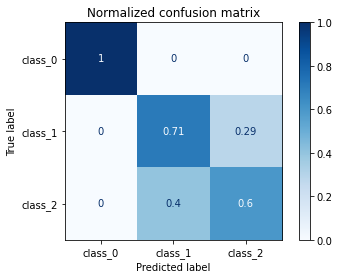

In [4]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 20%

train size :  142  / test size :  36

Training set score: 1.000000
Test set score: 0.805556
Training Time : 0.0050 sec


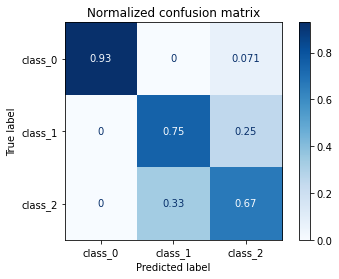

In [5]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 30%

train size :  124  / test size :  54

Training set score: 1.000000
Test set score: 0.759259
Training Time : 0.0055 sec


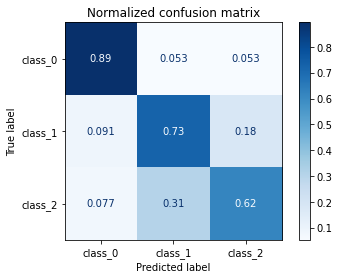

In [6]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 40%

train size :  106  / test size :  72

Training set score: 1.000000
Test set score: 0.791667
Training Time : 0.0063 sec


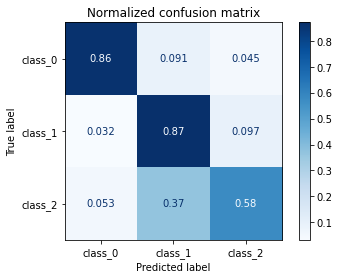

In [7]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 50%

train size :  89  / test size :  89

Training set score: 1.000000
Test set score: 0.752809
Training Time : 0.0076 sec


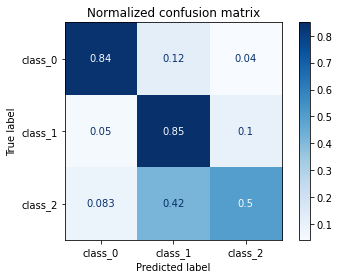

In [8]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 60%

train size :  71  / test size :  107

Training set score: 1.000000
Test set score: 0.728972
Training Time : 0.0052 sec


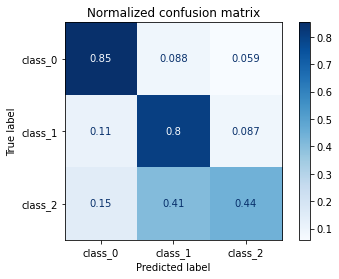

In [9]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 70%

train size :  53  / test size :  125

Training set score: 1.000000
Test set score: 0.776000
Training Time : 0.0079 sec


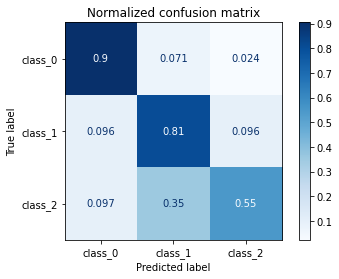

In [10]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 80%

train size :  35  / test size :  143

Training set score: 1.000000
Test set score: 0.734266
Training Time : 0.0057 sec


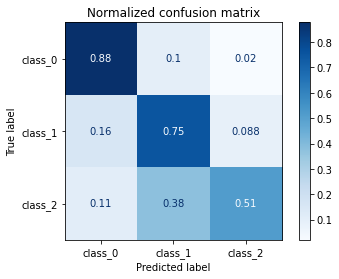

In [11]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 90%

train size :  17  / test size :  161

Training set score: 1.000000
Test set score: 0.739130
Training Time : 0.0055 sec


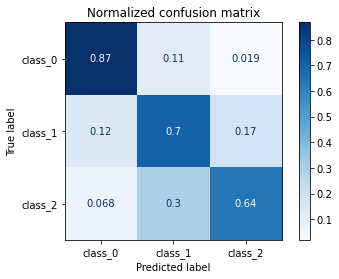

In [12]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Experiment Result

<Figure size 864x648 with 0 Axes>

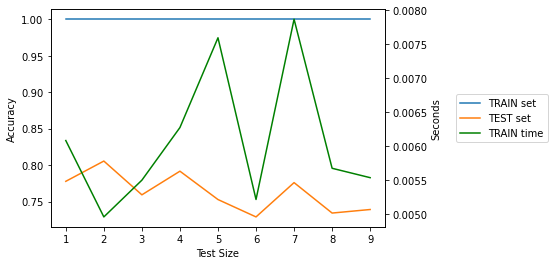

In [13]:
plt.figure(figsize=(12, 9))

fig, ax1 = plt.subplots()
ax1.set_xlabel("Test Size")
ax1.set_ylabel("Accuracy")
line1 = ax1.plot(range(1, 10), train_acc, label='TRAIN set')
line2 = ax1.plot(range(1, 10), test_acc, label='TEST set')

ax2 = ax1.twinx()
ax2.set_ylabel("Seconds")
line3 = ax2.plot(range(1, 10), train_time, label='TRAIN time', color='green')

lines = line1 + line2 + line3

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

## 2D kNN Classification

In [14]:
train_acc = []
test_acc = []
train_time = []

wine = load_wine()

pca = PCA(n_components=2)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target


### Test Size 10%

train size :  160  / test size :  18

Training set score: 1.000000
Test set score: 0.777778
Training Time : 0.0053 sec


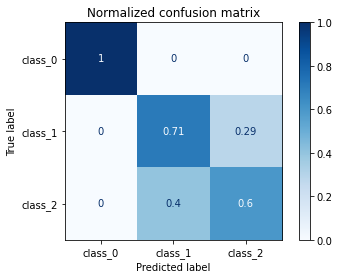

In [15]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 20%

train size :  142  / test size :  36

Training set score: 1.000000
Test set score: 0.777778
Training Time : 0.0087 sec


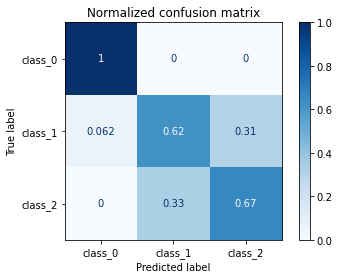

In [16]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 30%

train size :  124  / test size :  54

Training set score: 1.000000
Test set score: 0.648148
Training Time : 0.0064 sec


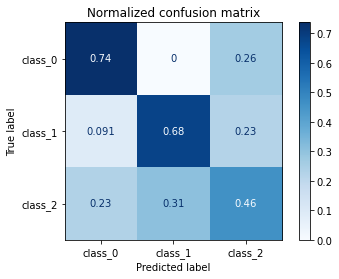

In [17]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 40%

train size :  106  / test size :  72

Training set score: 1.000000
Test set score: 0.680556
Training Time : 0.0076 sec


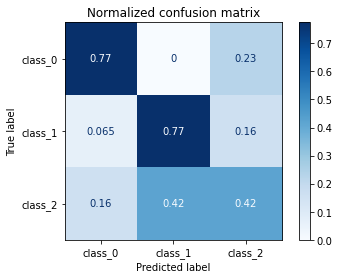

In [18]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 50%

train size :  89  / test size :  89

Training set score: 1.000000
Test set score: 0.719101
Training Time : 0.0046 sec


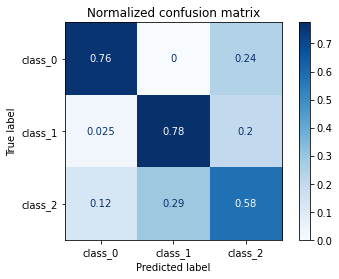

In [19]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 60%

train size :  71  / test size :  107

Training set score: 1.000000
Test set score: 0.682243
Training Time : 0.0060 sec


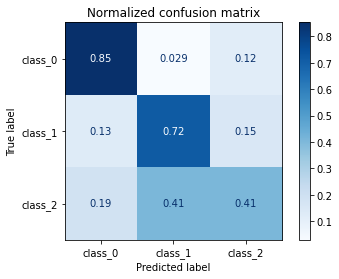

In [20]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 70%

train size :  53  / test size :  125

Training set score: 1.000000
Test set score: 0.728000
Training Time : 0.0057 sec


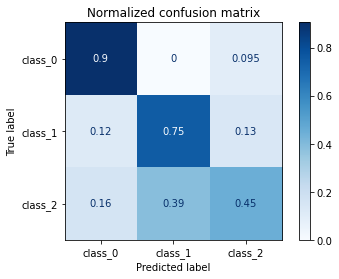

In [21]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 80%

train size :  35  / test size :  143

Training set score: 1.000000
Test set score: 0.734266
Training Time : 0.0050 sec


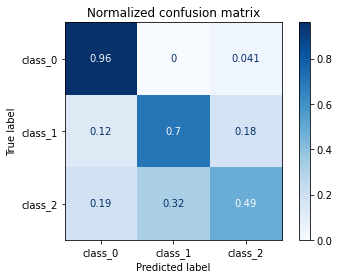

In [22]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 90%

train size :  17  / test size :  161

Training set score: 1.000000
Test set score: 0.720497
Training Time : 0.0067 sec


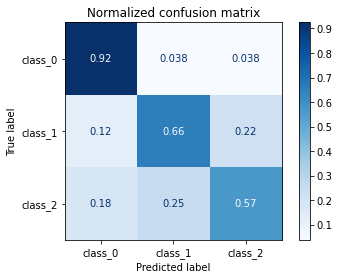

In [23]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % end, "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Experiment Result

<Figure size 864x648 with 0 Axes>

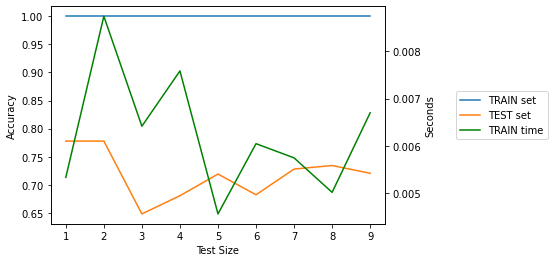

In [24]:
plt.figure(figsize=(12, 9))

fig, ax1 = plt.subplots()
ax1.set_xlabel("Test Size")
ax1.set_ylabel("Accuracy")
line1 = ax1.plot(range(1, 10), train_acc, label='TRAIN set')
line2 = ax1.plot(range(1, 10), test_acc, label='TEST set')

ax2 = ax1.twinx()
ax2.set_ylabel("Seconds")
line3 = ax2.plot(range(1, 10), train_time, label='TRAIN time', color='green')

lines = line1 + line2 + line3

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

## Nearest Centroid Classifier

In [25]:
train_acc = []
test_acc = []
train_time = []

wine = load_wine()

### Test Size 10%

train size :  160  / test size :  18

Training set score: 0.718750
Test set score: 0.777778
Training Time : 0.0004 sec


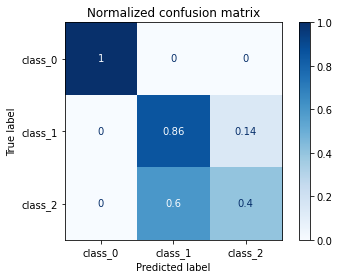

In [26]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 20%

train size :  142  / test size :  36

Training set score: 0.711268
Test set score: 0.777778
Training Time : 0.0006 sec


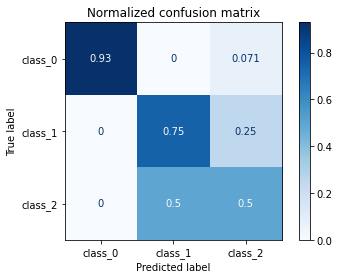

In [27]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 30%

train size :  124  / test size :  54

Training set score: 0.717742
Test set score: 0.740741
Training Time : 0.0007 sec


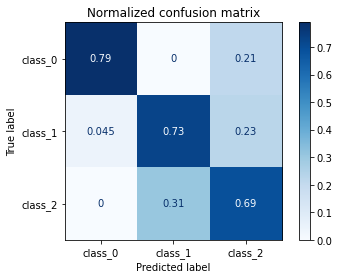

In [28]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 40%

train size :  106  / test size :  72

Training set score: 0.716981
Test set score: 0.736111
Training Time : 0.0008 sec


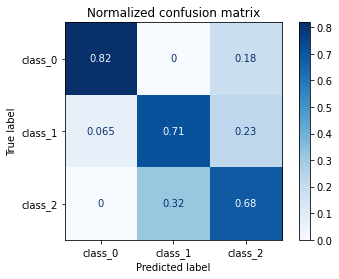

In [29]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.4, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 50%

train size :  89  / test size :  89

Training set score: 0.730337
Test set score: 0.719101
Training Time : 0.0003 sec


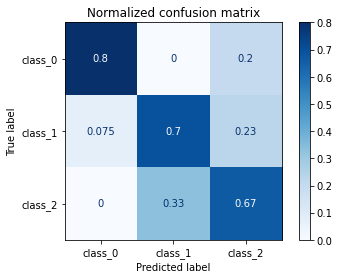

In [30]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 60%

train size :  71  / test size :  107

Training set score: 0.732394
Test set score: 0.719626
Training Time : 0.0004 sec


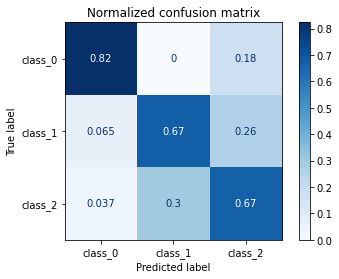

In [31]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.6, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 70%

train size :  53  / test size :  125

Training set score: 0.698113
Test set score: 0.736000
Training Time : 0.0006 sec


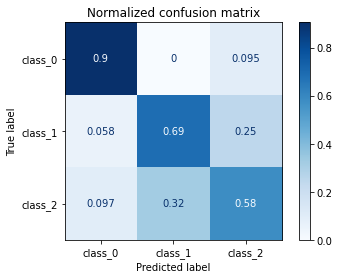

In [32]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.7, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 80%

train size :  35  / test size :  143

Training set score: 0.685714
Test set score: 0.727273
Training Time : 0.0005 sec


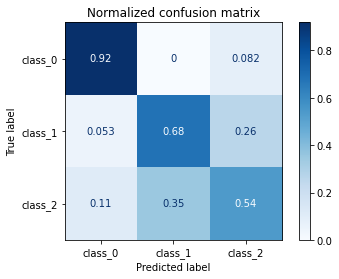

In [33]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.8, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Test Size 90%

train size :  17  / test size :  161

Training set score: 0.647059
Test set score: 0.714286
Training Time : 0.0008 sec


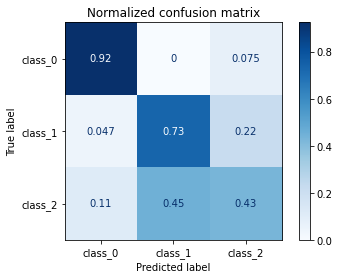

In [34]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.9, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train_acc.append(train_score)
test_acc.append(test_score)
train_time.append(end)

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

### Experiment Result

<Figure size 864x648 with 0 Axes>

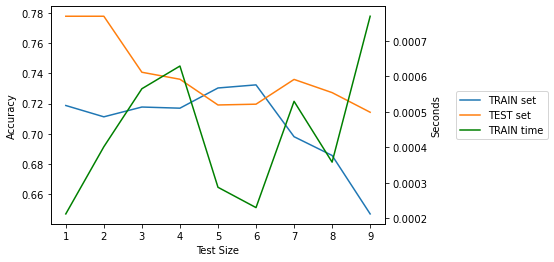

In [35]:
plt.figure(figsize=(12, 9))

fig, ax1 = plt.subplots()
ax1.set_xlabel("Test Size")
ax1.set_ylabel("Accuracy")
line1 = ax1.plot(range(1, 10), train_acc, label='TRAIN set')
line2 = ax1.plot(range(1, 10), test_acc, label='TEST set')

ax2 = ax1.twinx()
ax2.set_ylabel("Seconds")
line3 = ax2.plot(range(1, 10), train_time, label='TRAIN time', color='green')

lines = line1 + line2 + line3

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()